In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV

In [4]:
df = pd.read_csv("../../data/a1/regressor.csv")
df.head()

,date,temperature_min,dew_point_avg,humidity_avg,wind_speed_max,pressure_max,avg,bright_t31
0,2012-01-31,77.500944,73.447192,71.139385,13.879623,29.857765,42.185185,293.308462
1,2012-02-29,81.714286,74.571429,66.000000,14.000000,29.800000,40.379310,297.839063
2,2012-03-31,72.870968,73.212903,65.064516,12.838710,29.841935,43.354839,296.471739
3,2012-04-30,76.466667,74.133333,63.406667,17.300000,29.836667,34.000000,295.727601
4,2012-05-31,81.645161,74.422581,67.074194,16.129032,29.735484,25.600000,293.872184


In [5]:
features = df.columns.tolist()

features

['date',
 'temperature_min',
 'dew_point_avg',
 'humidity_avg',
 'wind_speed_max',
 'pressure_max',
 'avg',
 'bright_t31']

In [6]:
features = ['temperature_min', 'dew_point_avg', 'humidity_avg', 
            'wind_speed_max', 'pressure_max', 'bright_t31']

X = df[features]
y = df['avg']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
gbr = GradientBoostingRegressor(random_state=42)

param_dist = {
    "n_estimators": [100, 200, 300, 500],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [3, 5, 7, 10, 15],
    "subsample": [0.6, 0.8, 1.0],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 3, 5],
}

In [9]:
random_search = RandomizedSearchCV(
    gbr, param_distributions=param_dist, n_iter=50, cv=5, scoring="r2", 
    n_jobs=-1, verbose=2, random_state=42
)

random_search.fit(X, y)

best_model = random_search.best_estimator_
print("Best Hyperparameters:", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'subsample': 0.6, 'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_depth': 7, 'learning_rate': 0.01}


In [10]:
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test Set MAE:", mae)
print("Test Set R²:", r2)

Test Set MAE: 1.6974431955043494
Test Set R²: 0.9416469751362472


Average of the target variable: 27.40403805155058


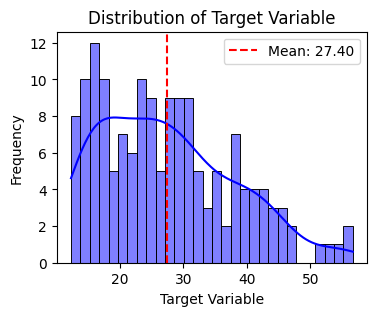

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'y' is your target variable
target_mean = y.mean()
print("Average of the target variable:", target_mean)

# Visualize with a histogram
plt.figure(figsize=(4, 3))
sns.histplot(y, kde=True, color='blue', bins=30)
plt.axvline(target_mean, color='red', linestyle='--', label=f'Mean: {target_mean:.2f}')
plt.title("Distribution of Target Variable")
plt.xlabel("Target Variable")
plt.ylabel("Frequency")
plt.legend()
plt.show()


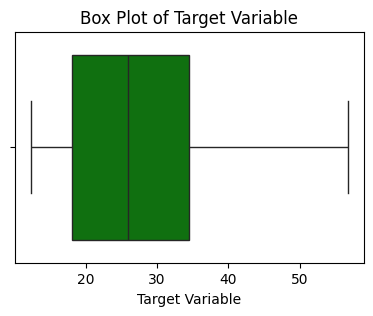

In [12]:
plt.figure(figsize=(4.5, 3))
sns.boxplot(x=y, color='green')
plt.title("Box Plot of Target Variable")
plt.xlabel("Target Variable")
plt.show()


In [13]:
percentage_error = (mae / target_mean) * 100
print(f"Percentage Error: {percentage_error:.2f}%")


Percentage Error: 6.19%


In [16]:
pred_heat = pd.read_csv("../../data/a1/bkk_fire_forecast.csv")

In [17]:
pred_weather = pd.read_csv("../../data/a1/bkk_weather_forecasts.csv")

In [18]:
pred_heat

,Unnamed: 0,Forecast
0,2025-01-01,296.527634
1,2025-02-01,298.495400
2,2025-03-01,298.001687
3,2025-04-01,296.515401
4,2025-05-01,294.418716
5,2025-06-01,291.238212
6,2025-07-01,290.104348
7,2025-08-01,290.710417
8,2025-09-01,292.286179
9,2025-10-01,292.962572


In [19]:
pred_weather

,Unnamed: 0,temperature_min,dew_point_avg,humidity_avg,wind_speed_max,pressure_max
0,2025-01-01,73.937399,66.001702,59.936968,10.927567,29.962235
1,2025-02-01,76.130002,69.495609,62.611846,12.243775,29.948831
2,2025-03-01,80.932229,73.983326,65.686083,13.327495,29.891894
3,2025-04-01,82.110178,74.981018,64.955275,14.436356,29.833971
4,2025-05-01,81.649949,75.788083,67.437158,15.481426,29.793205
5,2025-06-01,80.714307,75.220508,68.466501,15.980084,29.778122
6,2025-07-01,80.251153,74.781423,70.476092,16.277803,29.770377
7,2025-08-01,79.541085,74.832543,71.165397,15.780204,29.786701
8,2025-09-01,79.332062,75.512331,75.273864,14.610562,29.802886
9,2025-10-01,78.862733,75.009087,74.582823,12.701386,29.865865


In [22]:
pred_weather.rename(columns={pred_weather.columns[0]: "date"}, inplace=True)
print(pred_weather.head())

pred_heat.rename(columns={pred_heat.columns[0]: "date"}, inplace=True)
print(pred_heat.head())

         date  temperature_min  dew_point_avg  humidity_avg  wind_speed_max  \
0  2025-01-01        73.937399      66.001702     59.936968       10.927567   
1  2025-02-01        76.130002      69.495609     62.611846       12.243775   
2  2025-03-01        80.932229      73.983326     65.686083       13.327495   
3  2025-04-01        82.110178      74.981018     64.955275       14.436356   
4  2025-05-01        81.649949      75.788083     67.437158       15.481426   

   pressure_max  
0     29.962235  
1     29.948831  
2     29.891894  
3     29.833971  
4     29.793205  
         date    Forecast
0  2025-01-01  296.527634
1  2025-02-01  298.495400
2  2025-03-01  298.001687
3  2025-04-01  296.515401
4  2025-05-01  294.418716


In [23]:
# Merge the two DataFrames on the 'date' column
pred = pd.merge(pred_weather, pred_heat, on="date", how="inner")
pred.head()

,date,temperature_min,dew_point_avg,humidity_avg,wind_speed_max,pressure_max,Forecast
0,2025-01-01,73.937399,66.001702,59.936968,10.927567,29.962235,296.527634
1,2025-02-01,76.130002,69.495609,62.611846,12.243775,29.948831,298.495400
2,2025-03-01,80.932229,73.983326,65.686083,13.327495,29.891894,298.001687
3,2025-04-01,82.110178,74.981018,64.955275,14.436356,29.833971,296.515401
4,2025-05-01,81.649949,75.788083,67.437158,15.481426,29.793205,294.418716


In [24]:
pred.shape

(12, 7)